In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler


# from sklearn.preprocessing import BinaryEncoder
from category_encoders import BinaryEncoder


# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Tuning
from sklearn.model_selection import GridSearchCV


In [2]:
import sklearn

import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Deo',
 'Depression in IT.ipynb',
 'Final Project',
 'final project.ipynb',
 'Heart Disease Predictor .ipynb',
 'Heart Prediction Using LogReg.ipynb',
 'Mental Helath Or Depression in Tech Company.ipynb',
 'README.md']

In [3]:
sklearn.__version__

'0.24.0'

In [7]:
# !pip install --upgrade category_encodersdi
import os
os.listdir('
Final Project')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Final Project'

In [10]:
#reading the Dataset


df = pd.read_csv("Final Project/DatasetOSMI2014.csv")

In [11]:
df.shape

(1259, 27)

In [12]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [13]:
list(df.columns)

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [14]:
#checking the null values
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [15]:
df.isna().sum()/len(df.index)*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [16]:
len(df.index)

1259

In [17]:
#columns
df.columns


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [18]:
#dropping the null columns because of null values

df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [19]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


### Renaming  | PreProcessing

In [20]:
df.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History', 
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere', 
           'no_employees': 'Employee_Numbers', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company', 
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program', 
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave', 
           'mental_health_consequence': 'Mental_Health_Consequence', 
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers', 
           'supervisor': 'Supervisor', 'mental_health_interview': 'Mental_Health_Interview', 
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical', 
           'obs_consequence': 'Observed_Consequence'} , inplace = True , axis = 1)

In [21]:
df["Age"].isna().sum()

0

In [22]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [23]:
df['Age'].replace([df['Age'][df['Age'] < 15]], np.nan, inplace = True)

In [24]:
df[df["Age"]>100]

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Numbers,Remote_Work,Tech_Company,Benefits,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
364,3.290000e+02,Male,No,No,Yes,Often,6-25,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,1.000000e+11,All,Yes,Yes,Yes,Often,1-5,No,Yes,No,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [25]:
df['Age'].replace([df['Age'][df['Age'] >100]], np.nan, inplace = True)

In [26]:
# [df['Age'][df['Age'] >100]]
# [df['Age'][df['Age'] < 15]]
# df.iloc[364]

In [27]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [28]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)


In [29]:

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

In [30]:

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [31]:
df["Gender"].value_counts()

Male      991
Female    247
Queer      21
Name: Gender, dtype: int64

In [32]:
list(df.columns)

['Age',
 'Gender',
 'Self_Employed',
 'Family_History',
 'Treatment',
 'Work_Interfere',
 'Employee_Numbers',
 'Remote_Work',
 'Tech_Company',
 'Benefits',
 'Care_Options',
 'Wellness_Program',
 'Seek_Help',
 'Anonymity',
 'Medical_Leave',
 'Mental_Health_Consequence',
 'Physical_Health_Consequence',
 'Coworkers',
 'Supervisor',
 'Mental_Health_Interview',
 'Physical_Health_Interview',
 'Mental_VS_Physical',
 'Observed_Consequence']

### EDA

In [33]:
eda = df.copy()

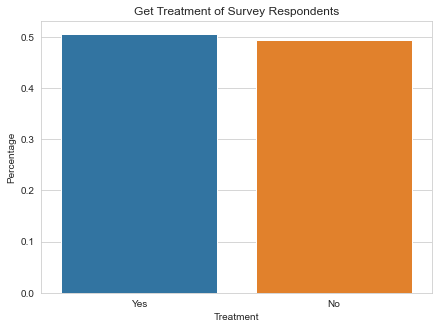

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = eda['Treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Get Treatment of Survey Respondents')
plt.show()

In [35]:
eda['Treatment'].value_counts(normalize = True).reset_index(name = 'Percentage')

,index,Percentage
0,Yes,0.505957
1,No,0.494043


In [36]:
def fun(s):
    rs =0
    for i in range(len(s)):
        rs = rs +i*int(s[i])
    return rs

In [37]:
# fun("1210")

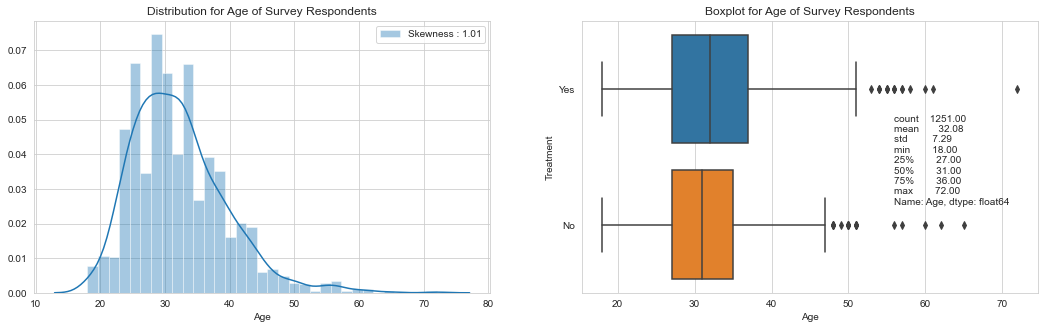

In [38]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(eda['Age'], label = 'Skewness : %.2f'%(eda['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')



plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "Treatment", data = eda)
plt.title('Boxplot for Age of Survey Respondents')
age = str(eda['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

In [39]:
eda["Age"].skew()

1.0129270475281602

In [40]:
eda["Age"].describe().round(2)

count    1251.00
mean       32.08
std         7.29
min        18.00
25%        27.00
50%        31.00
75%        36.00
max        72.00
Name: Age, dtype: float64

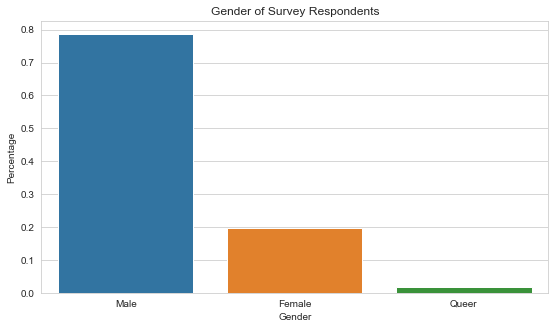

In [41]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percetage = eda["Gender"].value_counts(normalize=True).rename_axis("Gender").reset_index(name="Percentage")
sns.barplot(x="Gender",y="Percentage",data=eda_percetage.head(10))
plt.title("Gender of Survey Respondents")
plt.show()

In [42]:
eda["Gender"].value_counts(normalize=True).reset_index(name="Percentage")

,index,Percentage
0,Male,0.787133
1,Female,0.196187
2,Queer,0.016680


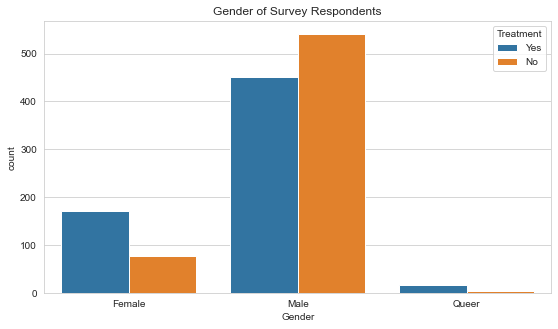

In [43]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Gender'], hue = eda['Treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Family History of Survey Respondents')

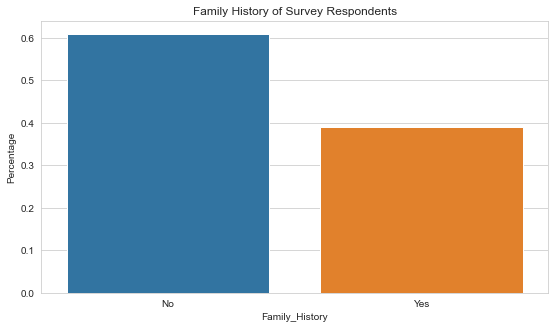

In [44]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Family_History'].value_counts(normalize = True).rename_axis('Family_History').reset_index(name = 'Percentage')
sns.barplot(x = 'Family_History', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')

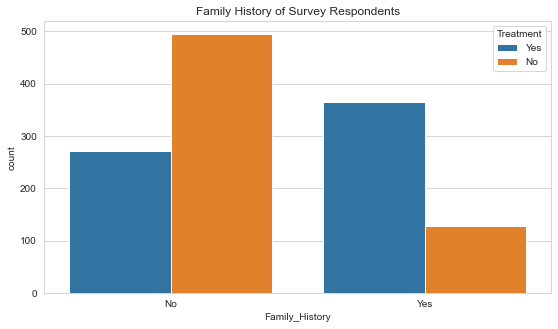

In [45]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Family_History'], hue = eda['Treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Work Interfere of Survey Respondents')

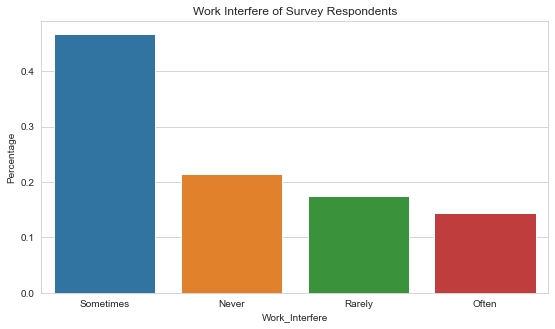

In [46]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Work_Interfere'].value_counts(normalize = True).rename_axis('Work_Interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'Work_Interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')

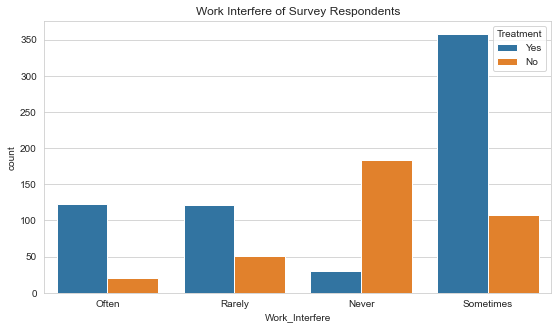

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Work_Interfere'], hue = eda['Treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Working Style of Survey Respondents')

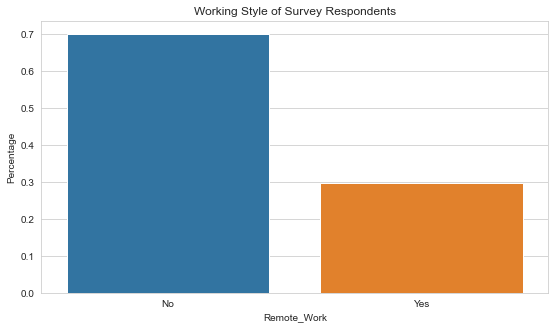

In [48]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Remote_Work'].value_counts(normalize = True).rename_axis('Remote_Work').reset_index(name = 'Percentage')
sns.barplot(x = 'Remote_Work', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')


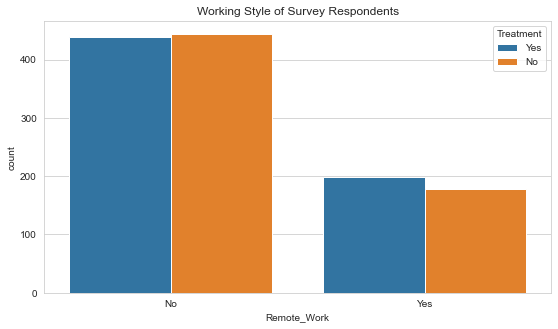

In [49]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Remote_Work'], hue = eda['Treatment'])
plt.title('Working Style of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Company Type of Survey Respondents')

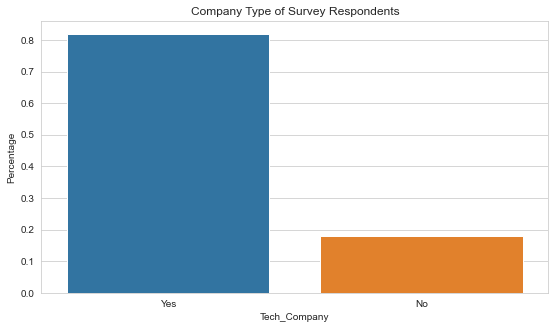

In [50]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Tech_Company'].value_counts(normalize = True).rename_axis('Tech_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Tech_Company', y = 'Percentage', data = eda_percentage)
plt.title('Company Type of Survey Respondents')

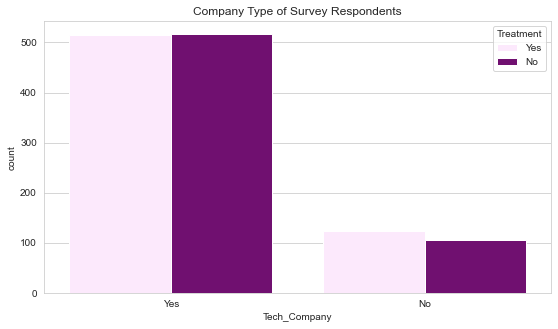

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Tech_Company'], hue = eda['Treatment'],color="purple")
plt.title('Company Type of Survey Respondents')
plt.show()

Text(0.5, 1.0, ' Coworkers of Survey Respondents')

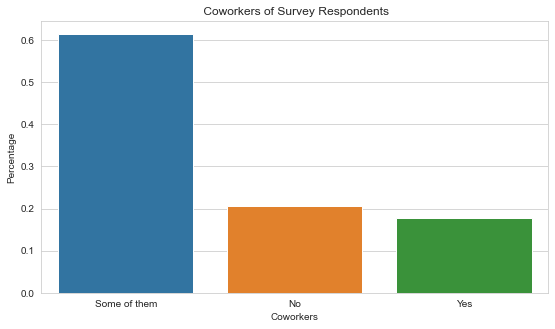

In [52]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)

percentage = eda["Coworkers"].value_counts(True).rename_axis("Coworkers").reset_index(name="Percentage")

sns.barplot(x = 'Coworkers', y = 'Percentage', data = percentage)
plt.title(' Coworkers of Survey Respondents')

Text(0.5, 1.0, 'Coworkers of Survey Respondents')

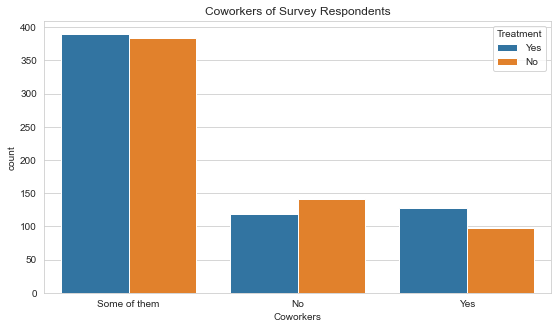

In [53]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(eda['Coworkers'], hue = eda['Treatment'])
plt.title('Coworkers of Survey Respondents')

In [54]:
eda["Supervisor"].value_counts(True).rename_axis("Supervisor").reset_index(name="Percentage")

,Supervisor,Percentage
0,Yes,0.409849
1,No,0.312153
2,Some of them,0.277998


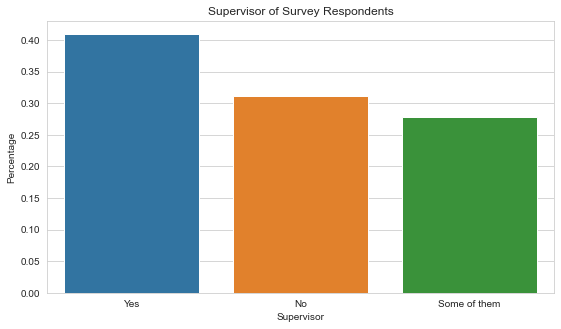

In [55]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
eda_percentage = eda["Supervisor"].value_counts(True).rename_axis("Supervisor").reset_index(name="Percentage")
sns.barplot(x="Supervisor",y="Percentage",data = eda_percentage.head(10))
plt.title("Supervisor of Survey Respondents")
plt.show()

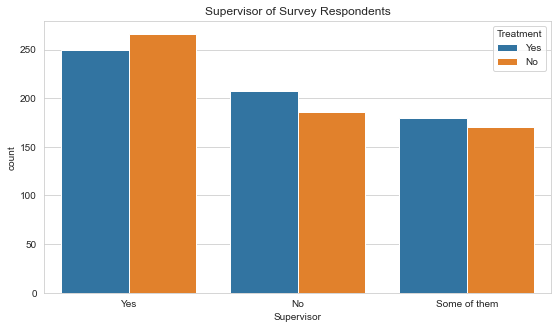

In [56]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Supervisor'], hue = eda['Treatment'])
plt.title('Supervisor of Survey Respondents')
plt.show()

In [57]:
eda["Supervisor"].value_counts(True)

Yes             0.409849
No              0.312153
Some of them    0.277998
Name: Supervisor, dtype: float64

Text(0.5, 1.0, 'Observed Consequence Survey Respondents')

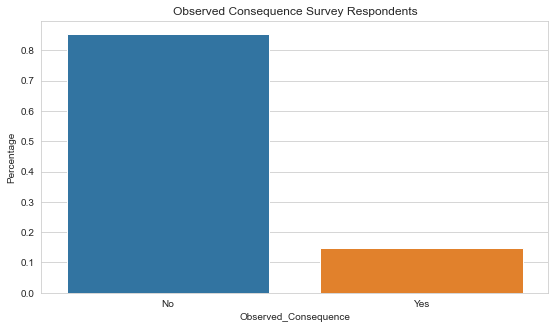

In [58]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Observed_Consequence'].value_counts(normalize = True).rename_axis('Observed_Consequence').reset_index(name = 'Percentage')
sns.barplot(x = 'Observed_Consequence', y = 'Percentage', data = eda_percentage)
plt.title('Observed Consequence Survey Respondents')


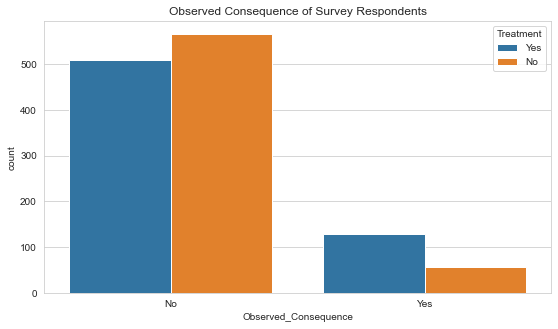

In [59]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.countplot(eda['Observed_Consequence'], hue = eda['Treatment'])
plt.title('Observed Consequence of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Benefits of Survey Respondents')

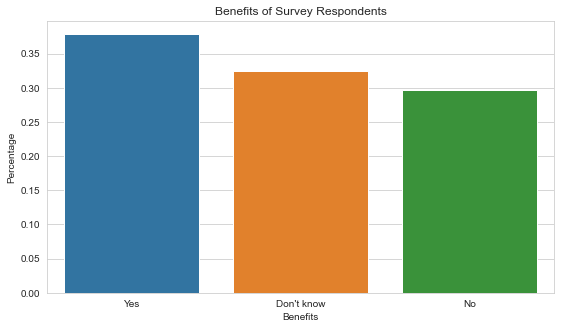

In [60]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Benefits'].value_counts(normalize = True).rename_axis('Benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'Benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')

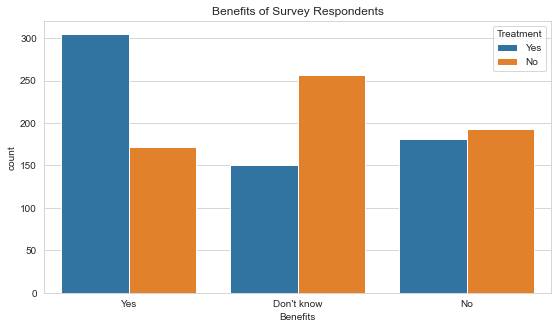

In [61]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(eda['Benefits'], hue = eda['Treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Wellness Program of Survey Respondents')

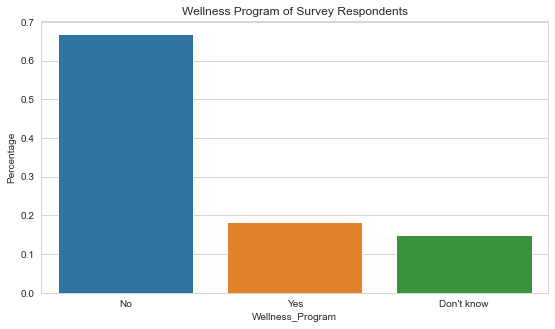

In [62]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Wellness_Program'].value_counts(normalize = True).rename_axis('Wellness_Program').reset_index(name = 'Percentage')
sns.barplot(x = 'Wellness_Program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness Program of Survey Respondents')

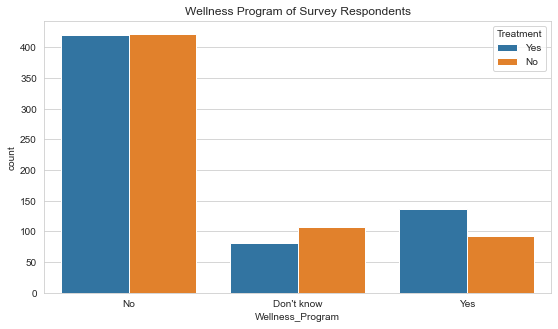

In [63]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)


sns.countplot(eda['Wellness_Program'], hue = eda['Treatment'])
plt.title('Wellness Program of Survey Respondents')
plt.show()

Text(0.5, 1.0, 'Anonymity of Survey Respondents')

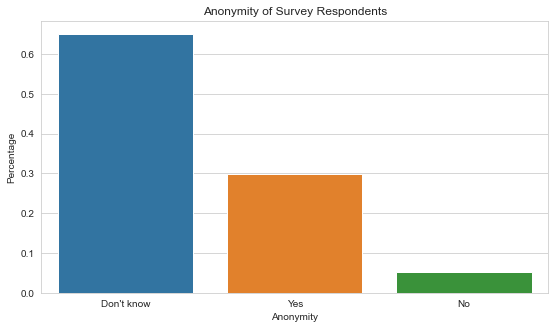

In [64]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = eda['Anonymity'].value_counts(normalize = True).rename_axis('Anonymity').reset_index(name = 'Percentage')
sns.barplot(x = 'Anonymity', y = 'Percentage', data = eda_percentage)
plt.title('Anonymity of Survey Respondents')

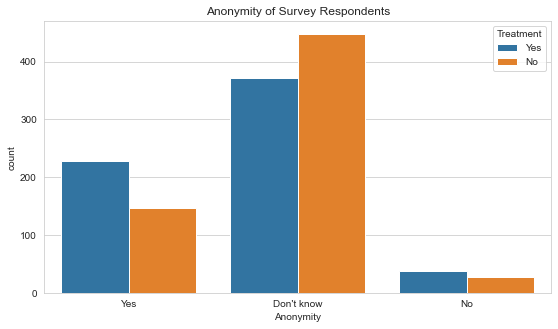

In [65]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(eda['Anonymity'], hue = eda['Treatment'])
plt.title('Anonymity of Survey Respondents')
plt.show()


Conclusion
Nearly 86% of employees report improved work performance and lower rates of absenteeism after receiving treatment for depression, according to an April 2018 article in the Journal of Occupational and Environmental Medicine. This means big gains in retention and productivity for employers. By providing employees access to mental health benefits, the company can begin to create a culture of understanding and compassion at the tech company. And having employees who feel cared for and happy isn’t just good, it’s good business.

### Preprocessing

- OneHotEncoding: Gender, Family History, Employee Numbers, Remote Work, Tech Company, Benefits, Care Options, Wellness Program, Seek Help, Anonymity, Medical Leave, Mental Health Consequence, Physical Health Consequence, Coworkers, Supervisor, Mental Health Interview, Physical Health Interview, Mental VS Physical, Observed Consequence
- Simple Imputer Most Frequent: Self Employed, Work Interfere
- Iterative Impute: Age
- Target: Treatment

In [66]:
# from numpy import array
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
# values = array(data)
# print(values)

In [67]:
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)

In [68]:
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))])

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['Gender', 'Family_History', 'Employee_Numbers',
                                                           'Remote_Work', 'Tech_Company', 'Benefits', 'Care_Options',
                                                           'Wellness_Program', 'Seek_Help', 'Anonymity',
                                                           'Medical_Leave', 'Mental_Health_Consequence',
                                                           'Physical_Health_Consequence', 'Coworkers', 'Supervisor',
                                                           'Mental_Health_Interview', 'Physical_Health_Interview',
                                                           'Mental_VS_Physical', 'Observed_Consequence']),
    ('mode_onehot_pipe', mode_onehot_pipe, ['Self_Employed', 'Work_Interfere']),
    ('iterative', IterativeImputer(max_iter = 10, random_state = 0), ['Age'])])

In [69]:
eda.describe(include=object)

,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Numbers,Remote_Work,Tech_Company,Benefits,Care_Options,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
count,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,3,2,2,2,4,6,2,2,3,3,...,3,5,3,3,3,3,3,3,3,2
top,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,991,1095,767,637,465,290,883,1031,477,501,...,819,563,490,925,774,516,1008,557,576,1075


In [70]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1251 non-null   float64
 1   Gender                       1259 non-null   object 
 2   Self_Employed                1241 non-null   object 
 3   Family_History               1259 non-null   object 
 4   Treatment                    1259 non-null   object 
 5   Work_Interfere               995 non-null    object 
 6   Employee_Numbers             1259 non-null   object 
 7   Remote_Work                  1259 non-null   object 
 8   Tech_Company                 1259 non-null   object 
 9   Benefits                     1259 non-null   object 
 10  Care_Options                 1259 non-null   object 
 11  Wellness_Program             1259 non-null   object 
 12  Seek_Help                    1259 non-null   object 
 13  Anonymity         

In [71]:
eda.isna().sum()

Age                              8
Gender                           0
Self_Employed                   18
Family_History                   0
Treatment                        0
Work_Interfere                 264
Employee_Numbers                 0
Remote_Work                      0
Tech_Company                     0
Benefits                         0
Care_Options                     0
Wellness_Program                 0
Seek_Help                        0
Anonymity                        0
Medical_Leave                    0
Mental_Health_Consequence        0
Physical_Health_Consequence      0
Coworkers                        0
Supervisor                       0
Mental_Health_Interview          0
Physical_Health_Interview        0
Mental_VS_Physical               0
Observed_Consequence             0
dtype: int64

In [134]:
eda["Self_Employed"].value_counts()

No     1095
Yes     146
Name: Self_Employed, dtype: int64

In [73]:
eda["Work_Interfere"].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: Work_Interfere, dtype: int64

In [74]:
eda['Treatment'].value_counts()/eda.shape[0]*100

Yes    50.595711
No     49.404289
Name: Treatment, dtype: float64

In [75]:
mh = df.copy()

In [76]:
mh['Treatment'] = np.where(eda['Treatment'] == 'Yes', 1, 0)

In [77]:
# 0 = No Treatment
# 1 = Get Treatment

In [78]:
mh

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Numbers,Remote_Work,Tech_Company,Benefits,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
0,37.0,Female,NaN,No,1,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,Male,NaN,No,0,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,Male,NaN,No,0,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,Male,NaN,Yes,1,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,Male,NaN,No,0,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,Male,No,No,1,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32.0,Male,No,Yes,1,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34.0,Male,No,Yes,1,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46.0,Female,No,No,0,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [79]:
X = mh.drop('Treatment', axis = 1)
y = mh['Treatment']

In [133]:
X

,Age,Gender,Self_Employed,Family_History,Work_Interfere,Employee_Numbers,Remote_Work,Tech_Company,Benefits,Care_Options,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
0,37.0,Female,NaN,No,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,Male,NaN,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,Male,NaN,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,Male,NaN,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,Male,NaN,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,Male,No,No,NaN,26-100,No,Yes,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32.0,Male,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34.0,Male,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46.0,Female,No,No,NaN,100-500,Yes,Yes,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [81]:
X.shape , y.shape

((1259, 22), (1259,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 2222)

### model 


In [83]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2222)
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [84]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
ada_pipe = Pipeline([('transformer', transformer), ('ada', ada)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', xgboost)])

def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')
ada_pipe_cv = model_evaluation(ada_pipe, 'recall')
grad_pipe_cv = model_evaluation(grad_pipe, 'recall')
xgb_pipe_cv = model_evaluation(xgb_pipe, 'recall')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    model.fit(X_train, y_train)

score_cv = [logreg_pipe_cv.round(5), tree_pipe_cv.round(5), knn_pipe_cv.round(5),
            rf_pipe_cv.round(5), ada_pipe_cv.round(5), grad_pipe_cv.round(5), xgb_pipe_cv.round(5)]

score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean(),
              ada_pipe_cv.mean(), grad_pipe_cv.mean(), xgb_pipe_cv.mean()]

score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std(),
             ada_pipe_cv.std(), grad_pipe_cv.std(), xgb_pipe_cv.std()]

score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test)),
            recall_score(y_test, tree_pipe.predict(X_test)), 
            recall_score(y_test, knn_pipe.predict(X_test)), 
            recall_score(y_test, rf_pipe.predict(X_test)),
            recall_score(y_test, ada_pipe.predict(X_test)),
            recall_score(y_test, grad_pipe.predict(X_test)),
            recall_score(y_test, xgb_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'Gradient Boosting Classifier', 'XGB Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,cv score,mean score,std score,recall score
0,Logistic Regression,"[0.75556, 0.70787, 0.74157, 0.69663, 0.75281]",0.730886,0.024112,0.701571
1,Decision Tree Classifier,"[0.65556, 0.66292, 0.60674, 0.67416, 0.66292]",0.652459,0.023620,0.617801
2,KNN Classifier,"[0.52222, 0.60674, 0.52809, 0.59551, 0.60674]",0.571860,0.038399,0.570681
3,Random Forest Classifier,"[0.78889, 0.75281, 0.74157, 0.76404, 0.74157]",0.757778,0.017647,0.664921
4,Ada Boost Classifier,"[0.75556, 0.7191, 0.74157, 0.68539, 0.73034]",0.726392,0.023793,0.722513
5,Gradient Boosting Classifier,"[0.82222, 0.7191, 0.73034, 0.77528, 0.77528]",0.764444,0.036858,0.712042
6,XGB Classifier,"[0.81111, 0.74157, 0.74157, 0.79775, 0.80899]",0.780200,0.031864,0.706806


In [94]:
def getMax(s):
    return max(s)

In [95]:
from matplotlib.cm import rainbow
svc_scores = cv_summary['cv score'].apply(getMax)

kernels = ['Logistic', 'Decison', 'Knn ', 'Random_Forest','Ada Boost','Gradient Boosting','XGB']


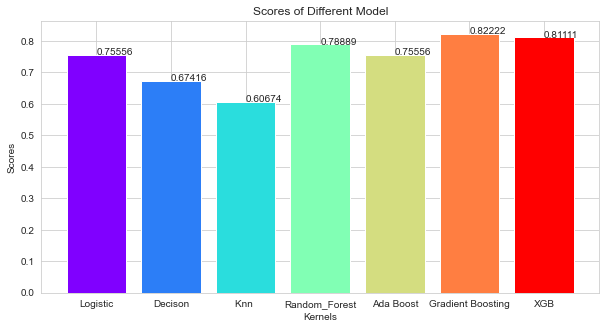

In [101]:
colors = rainbow(np.linspace(0, 1, len(kernels)))

plt.figure(figsize=(10,5))

plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Scores of Different Model')
plt.savefig('Model_Eval_Score.png')

In [102]:
lr_estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])

hyperparam_space = {
    'model__C': [ 1, 0.5, 0.1, 0.05, 0.01],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'model__class_weight': ['balanced', 'dict'],
    'model__max_iter': [100, 200, 300],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__random_state': [2222]
}

grid_lr = GridSearchCV(
                lr_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid_lr.fit(X_train, y_train)

print('best score', grid_lr.best_score_)
print('best param', grid_lr.best_params_)

best score 0.7376279650436953
best param {'model__C': 0.5, 'model__class_weight': 'dict', 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__random_state': 2222, 'model__solver': 'newton-cg'}


In [103]:
logreg_pipe.fit(X_train, y_train)
recall_logreg = (recall_score(y_test, logreg_pipe.predict(X_test)))

grid_lr.best_estimator_.fit(X_train, y_train)
recall_grid = (recall_score(y_test, grid_lr.predict(X_test)))

score_list = [recall_logreg, recall_grid]
method_name = ['Logistic Regression Before Tuning', 'Logistic Regression After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Logistic Regression Before Tuning,0.701571
1,Logistic Regression After Tuning,0.706806


### HyperParam Tuning

#### LogReg

In [104]:
alr_estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])

hyperparam_space = {
    'model__C': [ 1, 0.5, 0.1, 0.05, 0.01],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'model__class_weight': ['balanced', 'dict'],
    'model__max_iter': [100, 200, 300],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__random_state': [2222]
}

grid_lr = GridSearchCV(
                lr_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid_lr.fit(X_train, y_train)

print('best score', grid_lr.best_score_)
print('best param', grid_lr.best_params_)

best score 0.7376279650436953
best param {'model__C': 0.5, 'model__class_weight': 'dict', 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__random_state': 2222, 'model__solver': 'newton-cg'}


#### GradientBoosting

In [105]:
GB_est = Pipeline([('transformer' ,transformer),
                 ('model',grad)])

hyperparam_space ={
    
"learning_rates" : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    "n_estimators":[1, 2, 4, 8, 16, 32, 64, 100, 200],
    "max_depths": np.linspace(1, 20, 32, endpoint=True),
  "min_samples_leafs":np.linspace(0.1, 0.5, 5, endpoint=True),
    "max_features":list(range(1,X.shape[1]))

}

GridSearch_GB = GridSearchCV(GB_est,
                            param_grid=hyperparam_space,
                            cv=StratifiedKFold(n_splits=5),
                            scoring="accuracy",
                            n_jobs=-1,
                            )

GridSearch_GB.fit(X_train,y_train)


ValueError: Invalid parameter learning_rates for estimator Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Family_History',
                                                   'Employee_Numbers',
                                                   'Remote_Work',
                                                   'Tech_Company', 'Benefits',
                                                   'Care_Options',
                                                   'Wellness_Program',
                                                   'Seek_Help', 'Anonymity',
                                                   'Medical_Leave',
                                                   'Mental_Health_Consequence',
                                                   'Physical_Health_Consequence',
                                                   'Coworkers', 'Supervi...
                                                   'Physical_Health_Interview',
                                                   'Mental_VS_Physical',
                                                   'Observed_Consequence']),
                                                 ('mode_onehot_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Self_Employed',
                                                   'Work_Interfere']),
                                                 ('iterative',
                                                  IterativeImputer(random_state=0),
                                                  ['Age'])])),
                ('model', GradientBoostingClassifier(random_state=2222))]). Check the list of available parameters with `estimator.get_params().keys()`.

### Feature Selection 


In [106]:
transformer.transformers_

[('one hot',
  OneHotEncoder(handle_unknown='ignore'),
  ['Gender',
   'Family_History',
   'Employee_Numbers',
   'Remote_Work',
   'Tech_Company',
   'Benefits',
   'Care_Options',
   'Wellness_Program',
   'Seek_Help',
   'Anonymity',
   'Medical_Leave',
   'Mental_Health_Consequence',
   'Physical_Health_Consequence',
   'Coworkers',
   'Supervisor',
   'Mental_Health_Interview',
   'Physical_Health_Interview',
   'Mental_VS_Physical',
   'Observed_Consequence']),
 ('mode_onehot_pipe',
  Pipeline(steps=[('encoder', SimpleImputer(strategy='most_frequent')),
                  ('one hot encoder', OneHotEncoder(handle_unknown='ignore'))]),
  ['Self_Employed', 'Work_Interfere']),
 ('iterative', IterativeImputer(random_state=0), ['Age'])]

In [107]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Female', 'x0_Male', 'x0_Queer', 'x1_No', 'x1_Yes', 'x2_1-5',
       'x2_100-500', 'x2_26-100', 'x2_500-1000', 'x2_6-25',
       'x2_More than 1000', 'x3_No', 'x3_Yes', 'x4_No', 'x4_Yes',
       "x5_Don't know", 'x5_No', 'x5_Yes', 'x6_No', 'x6_Not sure',
       'x6_Yes', "x7_Don't know", 'x7_No', 'x7_Yes', "x8_Don't know",
       'x8_No', 'x8_Yes', "x9_Don't know", 'x9_No', 'x9_Yes',
       "x10_Don't know", 'x10_Somewhat difficult', 'x10_Somewhat easy',
       'x10_Very difficult', 'x10_Very easy', 'x11_Maybe', 'x11_No',
       'x11_Yes', 'x12_Maybe', 'x12_No', 'x12_Yes', 'x13_No',
       'x13_Some of them', 'x13_Yes', 'x14_No', 'x14_Some of them',
       'x14_Yes', 'x15_Maybe', 'x15_No', 'x15_Yes', 'x16_Maybe', 'x16_No',
       'x16_Yes', "x17_Don't know", 'x17_No', 'x17_Yes', 'x18_No',
       'x18_Yes'], dtype=object)

In [108]:
transformer.transformers_[0][1]

OneHotEncoder(handle_unknown='ignore')

In [109]:
transformer.transformers_[1][1][1].get_feature_names()

array(['x0_No', 'x0_Yes', 'x1_Never', 'x1_Often', 'x1_Rarely',
       'x1_Sometimes'], dtype=object)

In [110]:
features = list(transformer.transformers_[0][1].get_feature_names())+list(transformer.transformers_[1][1][1].get_feature_names())+['Age']
coef_table = pd.DataFrame({'coef': grid_lr.best_estimator_[1].coef_.flatten()}, index = features)
abs(coef_table).sort_values('coef', ascending = False)

,coef
x1_Never,1.775759
x1_Often,1.315276
x1_Yes,0.738512
x1_No,0.738510
x13_No,0.617663
...,...
x7_Don't know,0.030226
Age,0.027433
x12_Maybe,0.025868
x12_No,0.017964


In [111]:
grid_lr.best_estimator_[1]

LogisticRegression(C=0.5, class_weight='dict', random_state=2222,
                   solver='newton-cg')

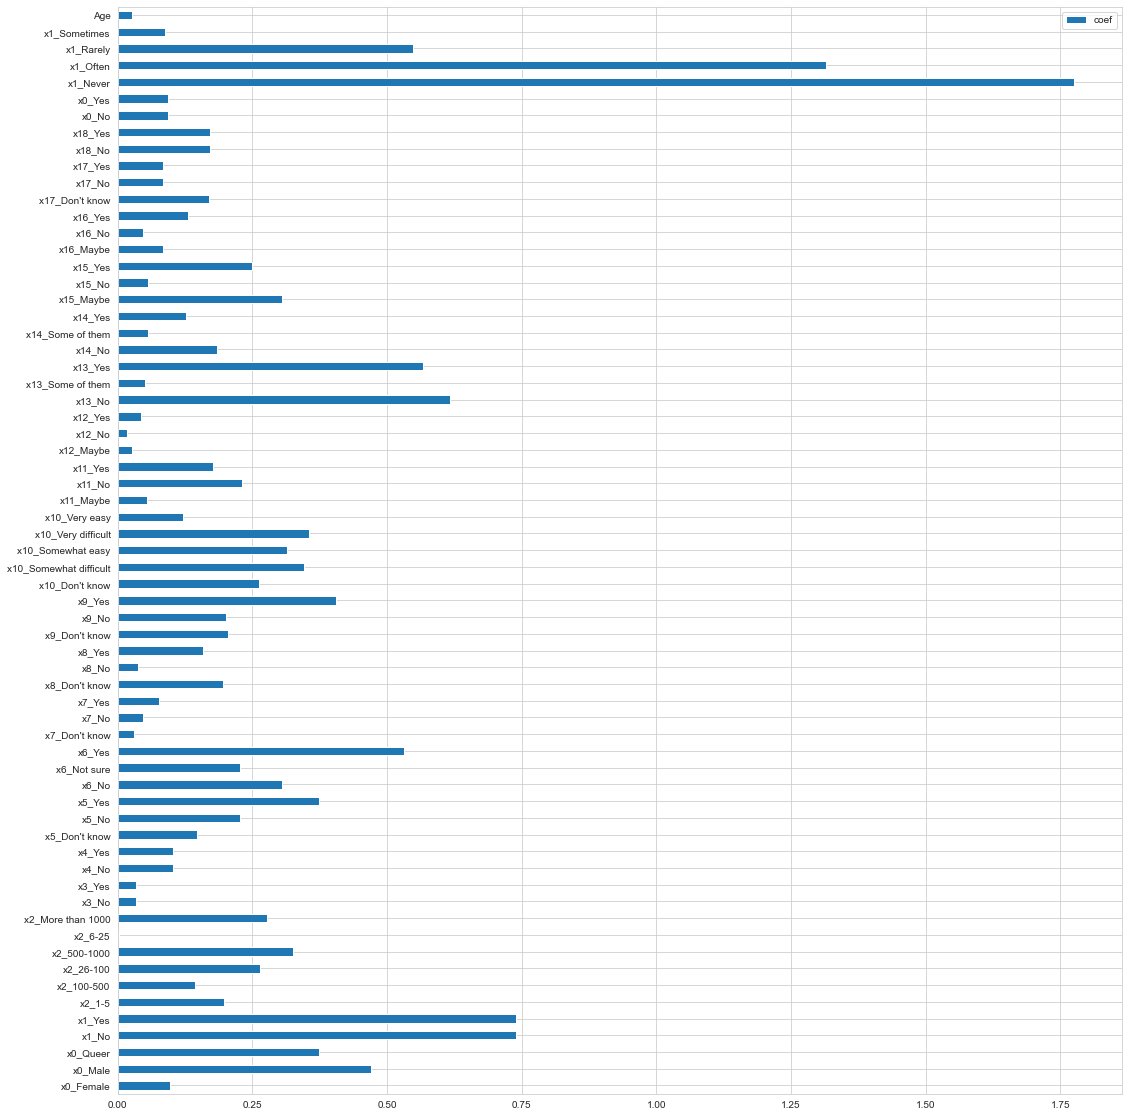

In [112]:
abs(coef_table).plot(kind = 'barh', figsize = (18,20))

In [113]:
mh_tuning = mh.copy()
mh_tuning.drop(columns = ['Age', 'Remote_Work', 'Wellness_Program', 'Physical_Health_Consequence'], inplace = True)
mh_tuning.head()

,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Numbers,Tech_Company,Benefits,Care_Options,Seek_Help,Anonymity,Medical_Leave,Mental_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
0,Female,NaN,No,1,Often,6-25,Yes,Yes,Not sure,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Maybe,Yes,No
1,Male,NaN,No,0,Rarely,More than 1000,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No
2,Male,NaN,No,0,Rarely,6-25,Yes,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,Yes,No,No
3,Male,NaN,Yes,1,Often,26-100,Yes,No,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,Male,NaN,No,0,Never,100-500,Yes,Yes,No,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Yes,Don't know,No


In [114]:
mode_onehot_pipe_second = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))])

transformer_second = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['Gender', 'Family_History', 'Employee_Numbers',
                                                           'Tech_Company', 'Benefits', 'Care_Options', 
                                                           'Seek_Help', 'Anonymity', 'Medical_Leave',
                                                           'Mental_Health_Consequence', 'Coworkers',
                                                           'Supervisor','Mental_Health_Interview',
                                                           'Physical_Health_Interview', 'Mental_VS_Physical',
                                                           'Observed_Consequence',]),
    ('mode_onehot_pipe', mode_onehot_pipe_second, ['Self_Employed', 'Work_Interfere']),])

In [115]:
X_select = mh_tuning.drop('Treatment', axis = 1)
y_select = mh_tuning['Treatment']

In [116]:
X_select_train, X_select_test, y_select_train, y_select_test = train_test_split(X_select,y_select,
                                                   stratify = y_select,
                                                    test_size = 0.3,
                                                   random_state = 2222)

In [117]:
logreg_second = LogisticRegression(C = 0.5, class_weight = 'dict', max_iter = 100,
                                   multi_class = 'auto', random_state = 2222, solver = 'newton-cg')
logreg_second_pipe = Pipeline([('transformer', transformer_second), ('model', logreg_second)])
logreg_second_pipe.fit(X_select_train, y_select_train)
print('After Feature Selection Process, the score is ', recall_score(y_select_test, logreg_second_pipe.predict(X_select_test)))

After Feature Selection Process, the score is  0.7277486910994765


In [118]:
logreg_second_pipe.fit(X_select, y_select)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Family_History',
                                                   'Employee_Numbers',
                                                   'Tech_Company', 'Benefits',
                                                   'Care_Options', 'Seek_Help',
                                                   'Anonymity', 'Medical_Leave',
                                                   'Mental_Health_Consequence',
                                                   'Coworkers', 'Supervisor',
                                                   'Mental_Health_Interview',
                                                   'Physical_Health_Interview',
                                                   'Mental_VS_Physical',
                                      

### Saving the Model

In [119]:
import pickle

file_name = 'Health.sav'

pickle.dump(logreg_second_pipe, open(file_name,'wb'))

In [120]:
loaded_model = pickle.load(open(file_name,'rb'))
loaded_model.predict(X_select_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [121]:
mh_predict = pd.DataFrame({
    'Gender': ['Female'],
    'Self_Employed': ['No'],
    'Family_History': ['Yes'],
    'Work_Interfere': ['Often'],
    'Employee_Numbers': ['100-500'],
    'Tech_Company': ['Yes'],
    'Benefits': ['Yes'],
    'Care_Options': ['Yes'],
    'Seek_Help': ['Yes'],
    'Anonymity': ['Yes'],
    'Medical_Leave': ['Somewhat easy'],
    'Mental_Health_Consequence': ['No'],
    'Coworkers': ['Some of them'],
    'Supervisor': ['Some of them'],
    'Mental_Health_Interview': ['No'],
    'Physical_Health_Interview': ['No'],
    'Mental_VS_Physical': ['No'],
    'Observed_Consequence': ['No']
})

In [122]:
mh_predict

,Gender,Self_Employed,Family_History,Work_Interfere,Employee_Numbers,Tech_Company,Benefits,Care_Options,Seek_Help,Anonymity,Medical_Leave,Mental_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
0,Female,No,Yes,Often,100-500,Yes,Yes,Yes,Yes,Yes,Somewhat easy,No,Some of them,Some of them,No,No,No,No


In [123]:
loaded_model.predict(mh_predict)

array([1])

In [124]:
loaded_model.predict_proba(mh_predict)

array([[0.0287118, 0.9712882]])

In [125]:
loaded_model.score(X_select_test,y_select_test)

0.7354497354497355

#### Testing Score


In [130]:
model_name = ["LogisticReg","DecisionTree","Knn Reg","RandomForm","ADAboost","GradientBoost","XGBBoost"]
scores=[]
i=0
for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    y_pred = model.predict(X_test)
    print(f'{model_name[i]} \t {model.score(X_test,y_test)}')
    scores.append(round(model.score(X_test,y_test),3))
    print("Accuracy score :" , accuracy_score(y_test,y_pred))
    i+=1
    

LogisticReg 	 0.7116402116402116
Accuracy score : 0.7116402116402116
DecisionTree 	 0.6349206349206349
Accuracy score : 0.6349206349206349
Knn Reg 	 0.6031746031746031
Accuracy score : 0.6031746031746031
RandomForm 	 0.6772486772486772
Accuracy score : 0.6772486772486772
ADAboost 	 0.7142857142857143
Accuracy score : 0.7142857142857143
GradientBoost 	 0.7037037037037037
Accuracy score : 0.7037037037037037
XGBBoost 	 0.7037037037037037
Accuracy score : 0.7037037037037037


In [131]:
scores

[0.712, 0.635, 0.603, 0.677, 0.714, 0.704, 0.704]

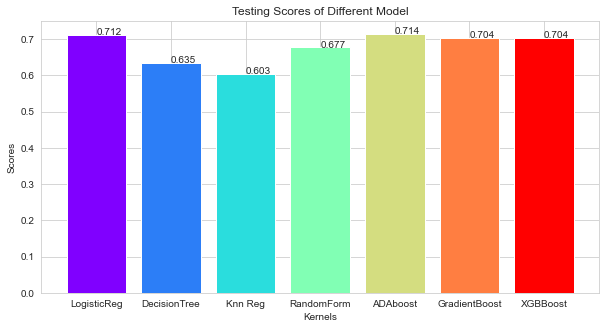

In [132]:
colors = rainbow(np.linspace(0, 1, len(kernels)))

plt.figure(figsize=(10,5))

plt.bar(model_name, scores, color = colors)
for i in range(len(model_name)):
    plt.text(i, scores[i], scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Testing Scores of Different Model')
plt.savefig('Model_Test_Scores.png')

In [228]:
y_pred = logreg_pipe.predict(X_test)

accuracy_score(y_test,y_pred)



0.7116402116402116

In [143]:
X_test.loc[501]

Age                                        40
Gender                                   Male
Self_Employed                             Yes
Family_History                            Yes
Work_Interfere                            NaN
Employee_Numbers               More than 1000
Remote_Work                                No
Tech_Company                              Yes
Benefits                                   No
Care_Options                               No
Wellness_Program                           No
Seek_Help                                  No
Anonymity                                  No
Medical_Leave                      Don't know
Mental_Health_Consequence                 Yes
Physical_Health_Consequence             Maybe
Coworkers                        Some of them
Supervisor                                 No
Mental_Health_Interview                    No
Physical_Health_Interview               Maybe
Mental_VS_Physical                         No
Observed_Consequence              

In [144]:
y_test.loc[501]

0

In [147]:
mh.loc[501]

Age                                        40
Gender                                   Male
Self_Employed                             Yes
Family_History                            Yes
Treatment                                   0
Work_Interfere                            NaN
Employee_Numbers               More than 1000
Remote_Work                                No
Tech_Company                              Yes
Benefits                                   No
Care_Options                               No
Wellness_Program                           No
Seek_Help                                  No
Anonymity                                  No
Medical_Leave                      Don't know
Mental_Health_Consequence                 Yes
Physical_Health_Consequence             Maybe
Coworkers                        Some of them
Supervisor                                 No
Mental_Health_Interview                    No
Physical_Health_Interview               Maybe
Mental_VS_Physical                